<a href="https://colab.research.google.com/github/jorge673/ADA-INFORMES-/blob/main/informe-BstOptimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. **Descripcion del problema**
---

### Problema. Árbol binario de búsqueda óptimo


**Entrada**: arreglo ordenado de n claves $a=[a_1,a_2,...,a_n]$. Cada clave $a_i$ tiene una probabilidad $p_i$ de ser buscada.

Ademas existen claves $d_i$ que representan búsquedas fallidas con $a_{i-1} \leq d_i \leq a_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: 

$\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida**: Se Construlle un árbol que minimice la cantidad esperada de nodos visitados, osea un arbol de busqueda optimo.

#2. **Descripcion del algoritmo**
---




##2.1 **Codigo Recursivo**

In [219]:
def sumaPromedio(p,q,i,j):
  s=0
  for n in range(i,j+1):
    s+=p[n]
  for n in range(i-1,j+1):
    s+=q[n]
  return s

p=[0,0.15,0.10,0.05,0.10,0.20]
q=[0.05,0.10,0.05,0.05,0.05,0.10]

sumaPromedio(p,q,1,len(q)-1)

1.0000000000000002

In [301]:
import sys

def OptimalBst(claves,p,q,i,j,verbose=False):
  global cont
  cont+=1

  if(verbose):
    print("Recurcion numero",cont)

  if j == i-1:
    if(verbose):
      print("-(j=i) Asi que se retorna q[i-1] =",q[i-1])
    return q[i-1]

  w=sumaPromedio(p,q,i,j)

  costOp=sys.maxsize

  
  for r in range(i,j+1):

    #calculamos el costo de i,j y el costo de el sub arbol derecho y el sub arbol izquierdo
    costo = w + OptimalBst(claves,p,q,i,r-1,verbose) + OptimalBst(claves,p,q,r+1,j,verbose)
    
    #si el costo es menor al optimo a este ultimo se le asigna el costo que calculamos
    if costo < costOp:
      costOp=costo
  
  if(verbose):
      print("\nCostoOptimo["+str(i)+"]["+str(j)+"] =",costOp,"\n======================================\n")
  return round(costOp,3)

claves=[0,1,2,3,4,5]
p=[0,0.15,0.10,0.05,0.10,0.20]
q=[0.05,0.10,0.05,0.05,0.05,0.10]

cont=0
OptimalBst(claves,p,q,1,len(p)-1,True)

Recurcion numero 1
Recurcion numero 2
-(j=i) Asi que se retorna q[i-1] = 0.05
Recurcion numero 3
Recurcion numero 4
-(j=i) Asi que se retorna q[i-1] = 0.1
Recurcion numero 5
Recurcion numero 6
-(j=i) Asi que se retorna q[i-1] = 0.05
Recurcion numero 7
Recurcion numero 8
-(j=i) Asi que se retorna q[i-1] = 0.05
Recurcion numero 9
Recurcion numero 10
-(j=i) Asi que se retorna q[i-1] = 0.05
Recurcion numero 11
-(j=i) Asi que se retorna q[i-1] = 0.1

CostoOptimo[5][5] = 0.5 

Recurcion numero 12
Recurcion numero 13
-(j=i) Asi que se retorna q[i-1] = 0.05
Recurcion numero 14
-(j=i) Asi que se retorna q[i-1] = 0.05

CostoOptimo[4][4] = 0.3 

Recurcion numero 15
-(j=i) Asi que se retorna q[i-1] = 0.1

CostoOptimo[4][5] = 0.9 

Recurcion numero 16
Recurcion numero 17
-(j=i) Asi que se retorna q[i-1] = 0.05
Recurcion numero 18
-(j=i) Asi que se retorna q[i-1] = 0.05

CostoOptimo[3][3] = 0.25 

Recurcion numero 19
Recurcion numero 20
-(j=i) Asi que se retorna q[i-1] = 0.05
Recurcion numero 21
-(j

2.75

##2.2 **Descripcion Recurcivo**
---
para encontrar el arbol mas optimo necesitamos encontrar la solucion optima de los costos esperados, esto gracias a la formula que define la sub-estructura optima del algoritmo

para obtener el resultado final tenemos que hacer todas las combinaciones posibles con las claves entregadas usando la recursividad

Para un arreglo $a$,los arreglos de probabilidad $P$ y $Q$

* generamos un caso base si $i=j$ y si se cumple retornamos C(i,j)
* calculamos el costo esperado segun la formula de la sub-estructura optima
* retornamos el costo


##2.3 **Codigo Bottom-Up**

In [284]:
from termcolor import colored


def printm(m,nombre,n=0,espacio="",destacar=[-1,-1]):
  print(nombre,"=")
  for i in range(n,len(m)):
    print(espacio,end="")

    for j in range(len(m[i])):

      cadena=str(m[i][j]).capitalize()

      if([i,j]==destacar):

        cadena=" "+cadena+" "
        print(colored(f"{cadena}","blue").center(6," "),end=" ")
      elif m[i][j]==0 and destacar!=[-1,-1]:
        cadena=" "+cadena+" "
        print(colored(f"{cadena}","red").center(6," "),end=" ")
      else:
        print(cadena.center(6," "),end=" ")
    print()
  print()

In [288]:


def BottomUpBst(key,p,q,verbose=False):
  n=len(p)
  
#Creamos la matris con ceros
  e=[]
  w=[]
  root=[]

  print(n for n in p)
  for x in range(0,n+1):
    aux=[0.00 for n in range(n)]
    e.append(aux)

  for x in range(0,n+1):
    aux=[0.00 for n in range(n)]
    w.append(aux)

  for x in range(n-1):
    aux=[0.00 for n in range(n-1)]
    root.append(aux)

#^generamos las matrices
  if(verbose):
    print("GENERAMOS LAS MATRICES\n")
    printm(w,"Suma de las probabilidades",1)
    printm(e,"Costo",1)
    printm(root,"Raices")
    print("======================================================================\n")

  #Rellenamos la diagonal
  for i in range(1,n+1):

    e[i][i-1]=q[i-1]
    w[i][i-1]=q[i-1]


  for l in range(1,n):

    for i in range(1,n-l+1):

      #j nos ayudara a navegar por las diagonales e ir sumando
      j=i+l-1
      #Generamos el valor maximo para el sistema
      e[i][j] = sys.maxsize

      #Calulamos el promedio
      prom = w[i][j-1]+p[j]+q[j]
      w[i][j] = round(prom,3)

      #Calculamos el costo
      for r in range(i,j+1):
        t = e[i][r-1]+e[r+1][j]+w[i][j]

        if t<e[i][j]:
          #si te es mayor al costo[i][j]
          e[i][j] = round(t,10)
          root[i-1][j-1] = r
          if(verbose):
            printm(e,"Calculando el Costo Actual",1,"    ",[i,j])
            print("======================================================================\n")

  if(verbose):

        print("RESULTADOS:\n")
        
        printm(w,"Suma de las probabilidades",1)
        printm(e,"Costo",1)
        printm(root,"Raices")

  return root 
keys=[0,1,2,3,4,5]
p=[0,0.15,0.10,0.05,0.10,0.20]
q=[0.05,0.10,0.05,0.05,0.05,0.10]
eso=BottomUpBst(keys,p,q,True)

<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58abe206d0>
GENERAMOS LAS MATRICES

Suma de las probabilidades =
 0.0    0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0    0.0   

Costo =
 0.0    0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0    0.0   

Raices =
 0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0   
 0.0    0.0    0.0    0.0    0.0   


Calculando el Costo Actual =
     0.05   0.45   0.0   0.0   0.0   0.0  
     0.0   0.1    0.0   0.0   0.0   0.0  
     0.0   0.0   0.05   0.0   0.0   0.0  
     0

##2.4 **Descripcion Bottom-Up**
---

por programacion dinamica primero generar una matris cuadrada M y llenar de 0 esta,

Calculamos las raices de cada segun la probabilidad y las colocamos dentro de una matris,

Luego iteramos y sacamos el minimo de la solucion optima de r, el subarbol izquierdo $T_i$ , y el sub-arbol derecho $T_d$.

para calular la solucion optima tenemos que:

$C(t)=\sum\limits_{i=1}^n p_i *$(Tiempo de busqueda en T)

Pero si esta ya se conoce entonces se representa:

$C(t)=p_r*1+\sum\limits_{i=1}^{r-1} p_i *$(1+Tiempo de busqueda en T) $+\sum\limits_{i=r+1}^n p_i *$(1+Tiempo de busqueda en T)

$C(t)=p_r*1+\sum\limits_{i=1}^{r-1}p_i+\sum\limits_{i=1}^{r-1} p_i *$(Tiempo de busqueda en T) $+\sum\limits_{i=r+1}^n p_i+\sum\limits_{i=r+1}^n p_i*$(Tiempo de busqueda en T)

$C(t)=\sum\limits_{i=1}^{n} p_i+\sum\limits_{i=1}^{r-1} p_i *$(1+Tiempo de busqueda en T) $+\sum\limits_{i=r+1}^n p_i *$(1+Tiempo de busqueda en T)


Finalmente tenemos que 

$C(t)=\sum\limits_{i=1}^{n}+C(t_i)+C(t_d)$


luego que calulamos todo ese proceso se retorna la matris de raices del arbol optimo en base la matriz C 







#3. **Correctitud**

##3.1 **Correctitud Sub-Estructura Optima**
---

>**Teorema:**_"La sub-estructura optima permite amortizar el costo que tendra el arbol que tendra el arbol a traves de sub-problema"._

Sea un costo $W'$ el costo del arbol con raices $k_i$ de un arreglo $k=[k_1,k_2,...,k_n]$, podemos calcular el minimo costo con el calculo de sus sub-problemas. teniendo $E(t)=$Combinaciones de un arreglo($k$) decimos que:

$$W'_{1,n}= Min(E(k))$$

$<$$W'_{1,n}>$ corresponde al mínimo valor obtenido para una serie de combinaciones donde se considera a cada elemento $k_i$ una raíz de un árbol binario de búsqueda óptimo..


>Sub estructura optima:
![img1](https://i.imgur.com/6vlMve0.png)

Asi podemos calcular el problema dividiendolo en sub-problemas tanto para el el arbol como los sub-arboles, cuando llega a un caso base de un solo elemento, Podemos calcular el valor minimo de la combinacion posible del arbol a retornar

>para cada elemento de $k_i$ se calcula 
el costo de sus sub arboles 
![img2](https://i.imgur.com/wVZgy6o.png)

Concluimos que el problema eventualmente tendra un caso base donde es el unico elemento del arrelgo, esto corresponde a las probablilidades ficticias que son las hojas de los arboles calculados,

Al armar el arbol se calcula el costo de los sub-arboles mas pequeños hasta los mas grandes apartir de los anteriores(los mas pequeños),

para calcular el minimo de cada arbol lo podemos hacer por una clabe de $k_i$

##3.2 **Funcion de recurrencia del valor optimo**
---
Dado los tres sub arreglo del algoritmo(`claves` para las claves,`p` para las probabilidades y `q` para probabilidades ficticias) podemos definir una funcion de recurrencia en base al anterior punto

Dado una clave $k_r$ perteneciente $[i...j]$ podemos obtener dos arreglos auxiliares:

> $a_1$ que va tiene contiene los elementos desde $[i...r-1]$
>
> $a_2$ que va tiene contiene los elementos desde $[r+1...j]$

A arreglos se puede obtener una un coste mínimo. Este proceso se puede repetir múltiples veces hasta conseguir el caso base donde se llega a las claves ficticias. Por tanto, podemos definir la siguiente función de recurrencia.


 $$W_{i,j} = min_{i \leq k \leq j}(C_{i,k-1} + C{k+1,j})+\sum_{r=i}^{j} p_r +\sum_{r=i-1}^{j} q_r ⇔ i < j$$


$$W_{i,j} = q[i] ⇔ i = j$$

Donde $W_{i,j}$ corresponde al costo del arreglo $a_1$ y $W_{k+1,j}$  corresponde a $a_2$, donde serian el sub-árbol izquierdo y derecho respectivamente.






##3.3 **Correctitud del algoritmo Bottom-Up**
---


>**Teorema**: _"El algoritmo resuelto mediante Bottom-up retorna el costo mínimo de un árbol binario de búsqueda óptimo"_

Dados tres arreglos del punto anterior (`calves`,`p`,`q`) podemos corregir por inducción  matematica:

* Sea $P(1)$ el caso base, correspondiente a un nodo hoja del árbol y esos nodos son las claves ficticias que tienen una probabilidades dadas en el arreglo $q$. las claves son inexistente, pero se puede decir que dichas probabilidades son equivalentes a los casos bases para empezar a contruir el valor óptimo. tambien al ser valores únicos, tambien son la subestructura óptima base para obtener el valor óptimo correcto.


* Sea $P(m)$ con $m < n$ un subproblema o sub-árbol del problema original, tienen un coste mínimo gracias a la estrategia Bottom-up, debido a que ya teniendo los problemas bases, se pueden ir armando los sub-árboles. Como dichos valores de los sub-problemas se van almacenando en estrcuturas axiliares, no debemos volver a calcular los valores que ya fueron obtenidos. En conclusión podemos decir que el algoritmo retorna el valor óptimo para un árbol que se puede construir a partir de un arreglo $k$.

#4. Complejidad
---

#5. **Experimentacion**
---

In [295]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = list(arr[n:]) # Probabilidad de las claves ficticias
    return keys, p, q
    


<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148a50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148a50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148a50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148a50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148a50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148a50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148a50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148a50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148a50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148a50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148e50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148e50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148e50>
<generator object BottomUpBst.<locals>.<genexpr> at 0x7f58ac148e50>
<generator object BottomUpBst.<locals>.<genexpr>

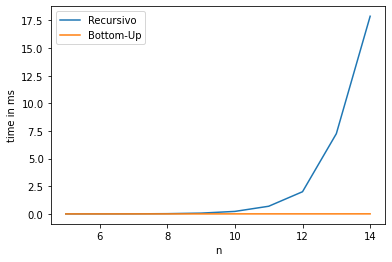

In [305]:
import random
import datetime
import matplotlib.pyplot as plt
from timeit import repeat

rx=[]; ry=[]


for n in range(5,15):

  keys, p, q = optimal_bst_instance_generator(n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import OptimalBst", stmt=f"OptimalBst({keys},{p},{q},{1},{len(p)-1})", repeat=1, number=10)

  rx.append(n)
  ry.append(t)

bx=[]; by=[]

for n in range(5,15):

  keys, p, q = optimal_bst_instance_generator(n)
  t = repeat(setup="from __main__ import BottomUpBst", stmt=f"BottomUpBst({keys},{p},{q})", repeat=1, number=10)

  bx.append(n)
  by.append(t)


plt.plot(rx,ry)
plt.plot(bx,by)
plt.legend(["Recursivo", "Bottom-Up"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()